In [1]:
#importing the libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [35]:
# Loading the dataset as customer_data

customer_data = pd.read_excel('cust_data.xlsx')

In [36]:
customer_data

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# EDA
#________________________________________________________

# Checking for null entries and memory usage of the data 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [38]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
Orders,30000.0,4.169800,3.590311,0.0,1.00,4.0,7.00,12.0
Jordan,30000.0,0.267433,0.804778,0.0,0.00,0.0,0.00,24.0
Gatorade,30000.0,0.252333,0.705368,0.0,0.00,0.0,0.00,15.0
Samsung,30000.0,0.222933,0.917494,0.0,0.00,0.0,0.00,27.0
Asus,30000.0,0.161333,0.740038,0.0,0.00,0.0,0.00,17.0
Udis,30000.0,0.143533,0.641258,0.0,0.00,0.0,0.00,14.0
Mondelez International,30000.0,0.139767,0.525840,0.0,0.00,0.0,0.00,31.0
Wrangler,30000.0,0.106933,0.515921,0.0,0.00,0.0,0.00,9.0
Vans,30000.0,0.111433,0.547990,0.0,0.00,0.0,0.00,16.0


In [39]:
# Missing values treatment 

customer_data['Gender'].fillna(method = 'ffill' , inplace = True)

In [40]:
#cross-checking if null values are gone 

customer_data.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [41]:
#checking for duplicate entries 

customer_data.duplicated().sum()

0

In [42]:
#Dropping the unnecessary columns 

customer_data.drop('Cust_ID', axis = 1 , inplace = True)

In [43]:
# Mapping Gender column values to 0 and 1 
Gender_map = {'M':1, 'F':0}
customer_data['Gender_labels'] = customer_data['Gender'].map(Gender_map) 

In [44]:
customer_data

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_labels
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,F,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29998,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
customer_data.drop('Gender', axis = 1 , inplace = True)

<AxesSubplot:>

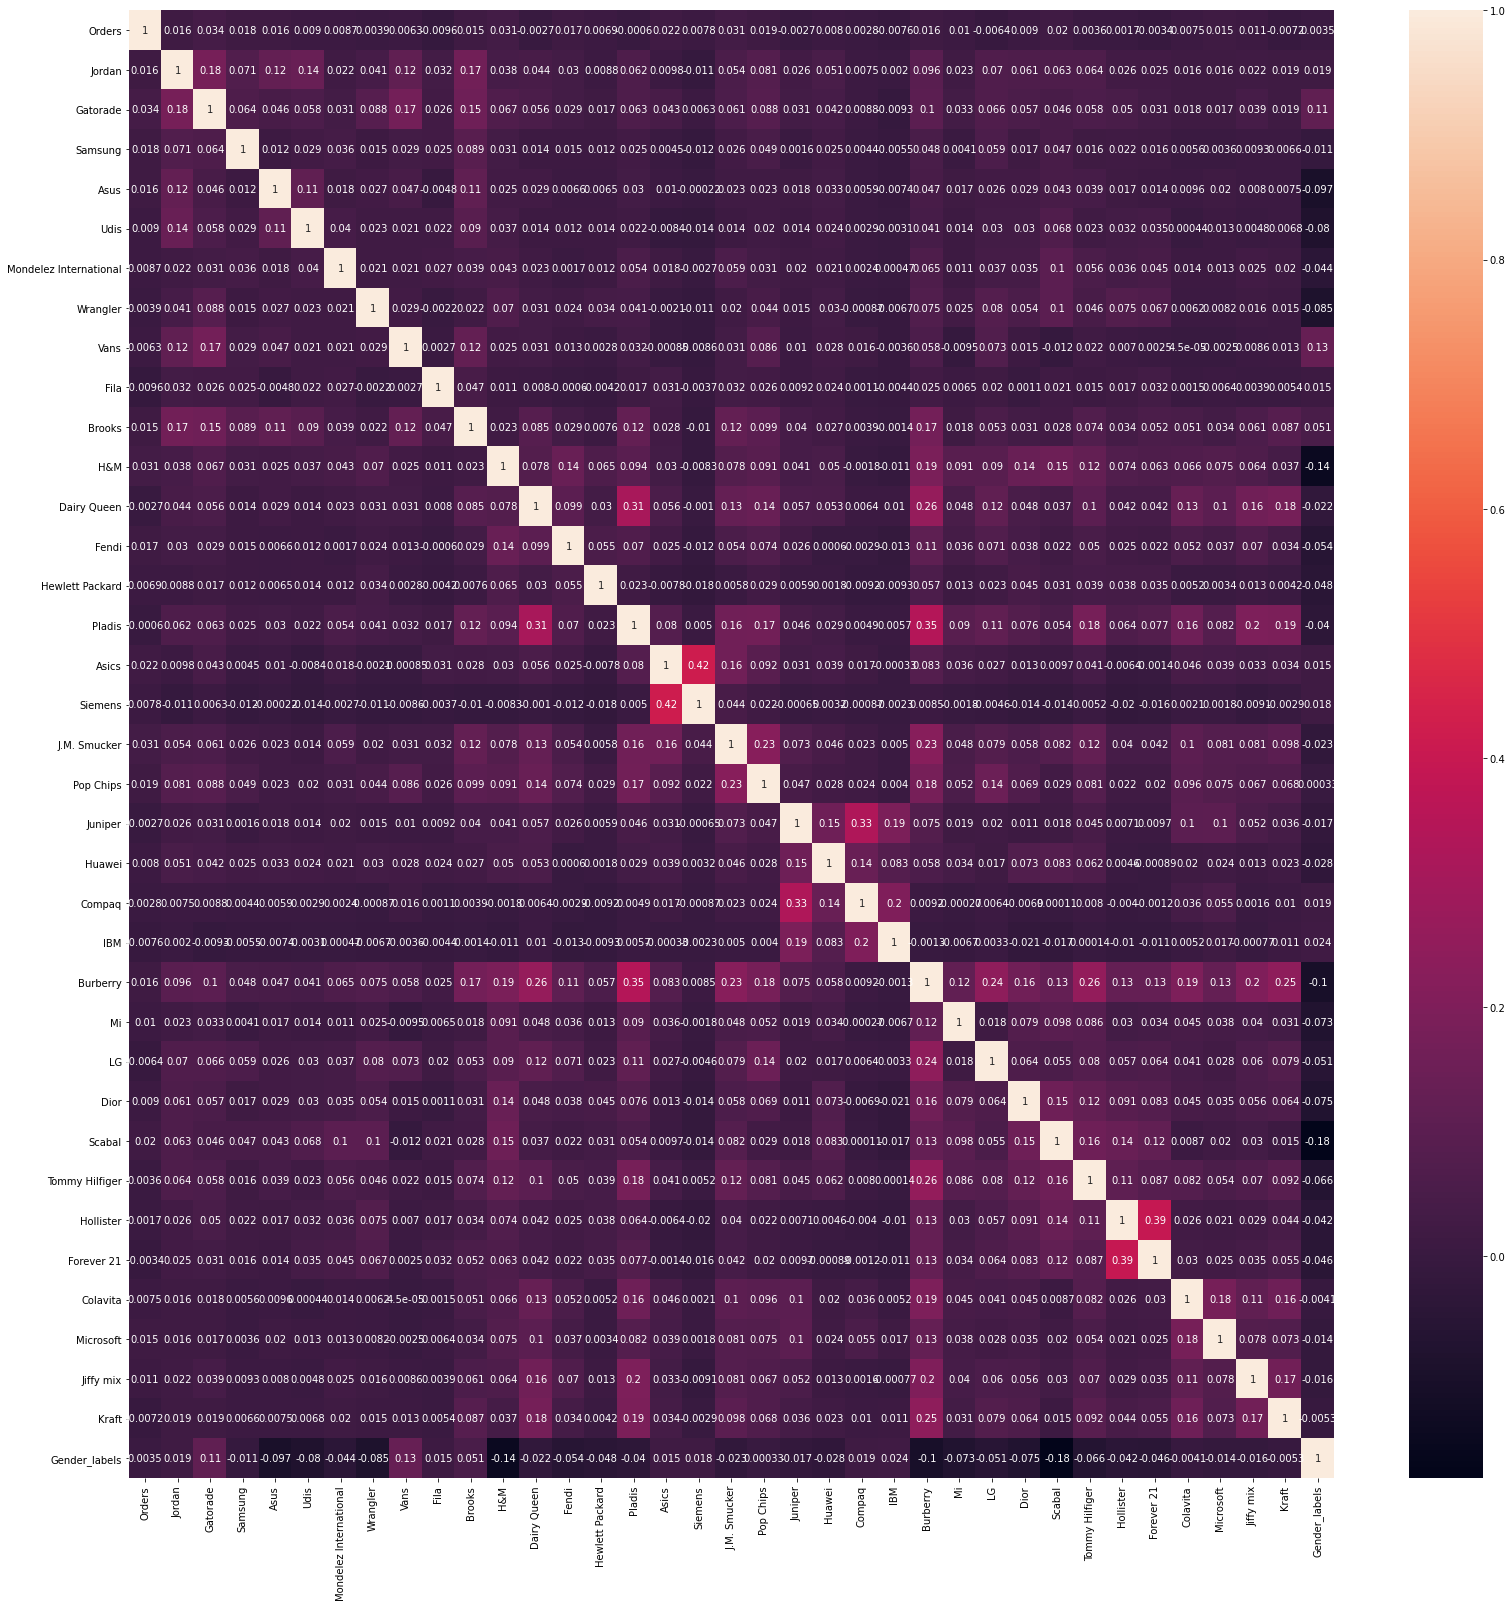

In [66]:
#Correlation matrix heat map

correlations = customer_data.corr()
plt.figure(figsize=(27,27))
sns.heatmap(correlations , annot = True)

#### - Some brands like Asics and Siemens are highly correlated 
#### - Very less or no correlation between Gender and brands in most of the cases .. but some brands like Vans, H&M, Burberry have 
####    some correlation with Gender .

C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Asics', ylabel='Siemens'>

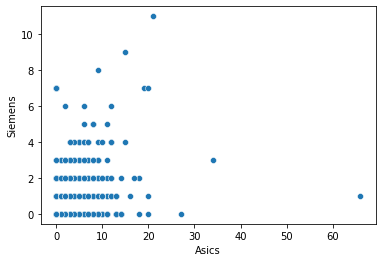

In [68]:
sns.scatterplot(customer_data['Asics'], customer_data['Siemens'])

C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender_labels', ylabel='Siemens'>

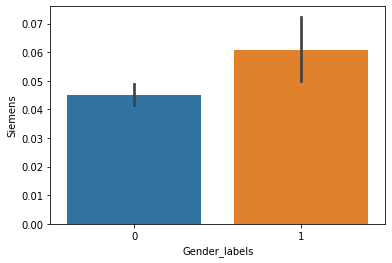

In [81]:
sns.barplot(customer_data['Gender_labels'], customer_data['Siemens'])

C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender_labels', ylabel='H&M'>

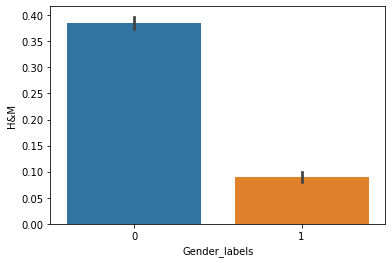

In [83]:
sns.barplot(customer_data['Gender_labels'], customer_data['H&M'])

#### H&M is mostly searched by Men . 

C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='H&M', ylabel='count'>

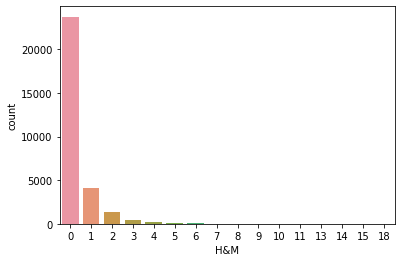

In [79]:
sns.countplot(customer_data['H&M'])

C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

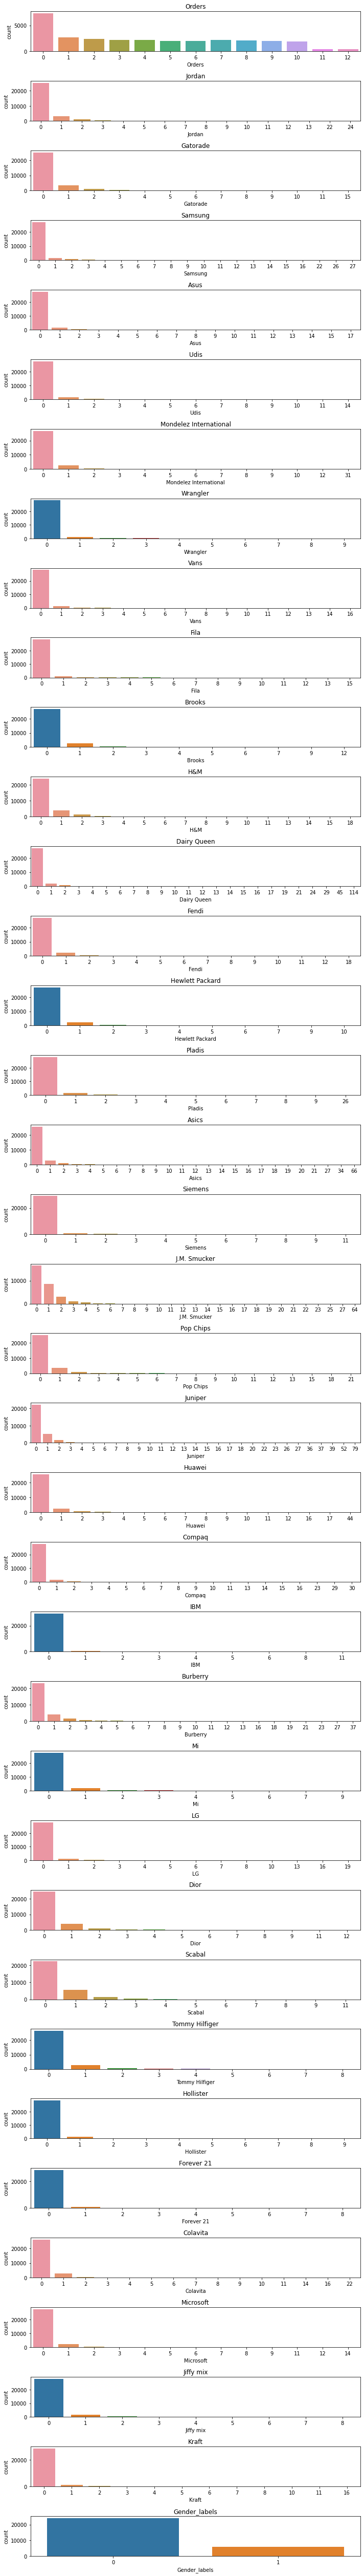

In [75]:
plt.figure(figsize = (10,70))
for i in range(len(customer_data.columns)):
    plt.subplot(37, 1, i+1)
    sns.countplot(customer_data[customer_data.columns[i]])
    plt.title(customer_data.columns[i])

plt.tight_layout()

####  - J.M. Smucker is the most searched brands among all .. then comes Scabal. 
####  - Data is highly skewed towards Male (More Males than Females)

C:\Users\Rk\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='J.M. Smucker', ylabel='count'>

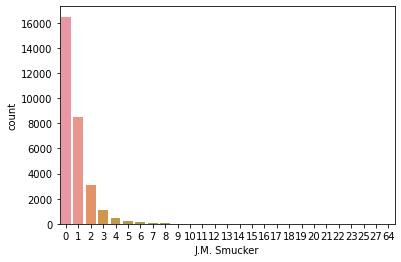

In [80]:
sns.countplot(customer_data['J.M. Smucker'])

In [15]:
#Finding the optimal number of clusters using the Elbow Method
#_____________________________________________________________

#No need to scale the data as there are no complex numnerical values just integers 

#scaler  = StandardScaler()
#customer_data_scaled = scaler.fit_transform(customer_data)

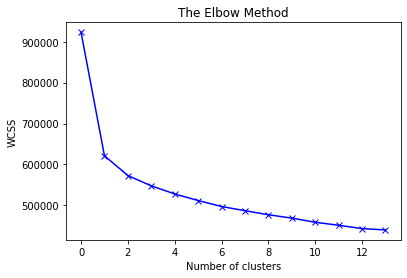

In [46]:
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_data)
    wcss.append(kmeans.inertia_)

plt.plot(wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### According to the elbow method graph above, the optimal number of clusters for the given dataset is 3 ie. k = 3

In [53]:
#applying K-Means Method to the dataset 

kmeans = KMeans(3)
y_kmeans = kmeans.fit_predict(customer_data)

In [56]:
y_kmeans

array([2, 0, 2, ..., 0, 0, 1])

In [57]:
#concatenate the cluster labels to our original dataframe 

customer_data_labeled = pd.concat([customer_data, pd.DataFrame({'cluster':y_kmeans})], axis = 1)

In [58]:
customer_data_labeled

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_labels,cluster
0,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,2
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29997,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
#Applying Principle Component Analysis (PCA) for visualising the results

pca = PCA(n_components = 2) # 2-D feature space
principal_comp = pca.fit_transform(customer_data)
principal_comp

array([[ 2.80394344, -1.29303446],
       [-4.10231979,  3.74837684],
       [ 2.84009026, -0.23459337],
       ...,
       [-4.18806763, -1.13374526],
       [-4.19204171, -1.0793795 ],
       [-1.15988409,  0.01447277]])

In [60]:
pca_df = pd.DataFrame(data = principal_comp , columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,2.803943,-1.293034
1,-4.102320,3.748377
2,2.840090,-0.234593
3,-4.184708,-0.927291
4,5.864276,2.629442


In [61]:
pca_df.shape

(30000, 2)

In [62]:
#concatenate the clusters labels to the dataframe

pca_df= pd.concat([pca_df,pd.DataFrame({'Cluster':y_kmeans})], axis = 1)
pca_df.head()

,pca1,pca2,Cluster
0,2.803943,-1.293034,2
1,-4.102320,3.748377,0
2,2.840090,-0.234593,2
3,-4.184708,-0.927291,0
4,5.864276,2.629442,2


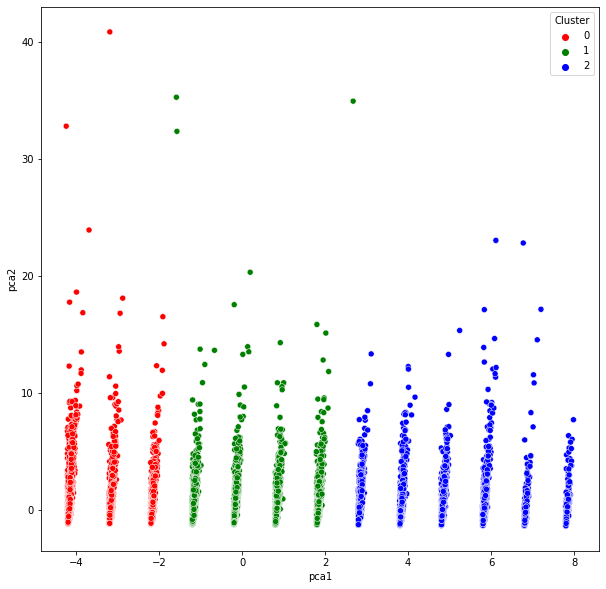

In [63]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', data = pca_df , hue = 'Cluster', palette = ['red', 'green', 'blue'])
plt.show()

### We divided the whole data into 3 groups based on their purchasing behaviour, previous orders,mostly searched brands and so on.